In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

2023-04-23 19:53:41.550802: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-23 19:53:44.446196: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
device = tf.config.list_physical_devices('GPU')[0]
tf.config.experimental.set_memory_growth(device, True)

2023-04-23 19:53:50.454014: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-23 19:53:50.535795: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-23 19:53:50.536451: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [3]:
# Load Data
(training_images, training_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

(<matplotlib.image.AxesImage at 0x7f481e6e9130>, (28, 28))

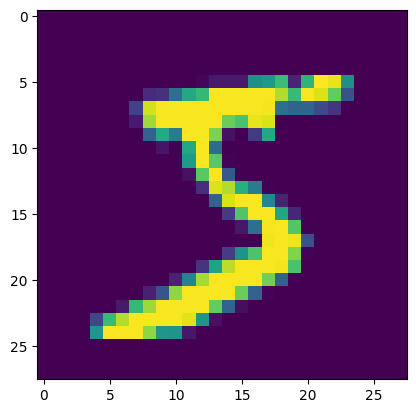

In [4]:
# Visualize
plt.imshow(training_images[0]) , training_images[0].shape

In [5]:
# Model
model = tf.keras.models.Sequential([                                                    
  # Convolutions and max pooling
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  # Define layers
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


2023-04-23 19:53:52.187495: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-23 19:53:52.188252: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-23 19:53:52.188884: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 512)               4

In [7]:
class takeRest(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.99:
            print("\nGood job nothing less expected from trainer like thunder-007\n")
            self.model.stop_training = True

In [8]:
# Let's train
model.fit(training_images, training_labels, epochs=10,callbacks=[takeRest()])

Epoch 1/10


2023-04-23 19:54:00.101948: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-04-23 19:54:02.329404: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f460f7f7d60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-04-23 19:54:02.329486: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce GTX 1650 Ti, Compute Capability 7.5
2023-04-23 19:54:02.345766: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-04-23 19:54:02.903441: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 [==============================] - 33s 12ms/step - loss: 0.2570 - accuracy: 0.9535
Epoch 2/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0626 - accuracy: 0.9813
Epoch 3/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0493 - accuracy: 0.9848
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0404 - accuracy: 0.9877
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0372 - accuracy: 0.9890
Epoch 6/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.0296 - accuracy: 0.9913
Good job nothing less expected from trainer like thunder-007

1875/1875 [==============================] - 21s 11ms/step - loss: 0.0297 - accuracy: 0.9913


In [9]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 3s 8ms/step - loss: 0.0664 - accuracy: 0.9857


[0.06636536121368408, 0.9857000112533569]

1/1 [==============================] - 0s 58ms/step


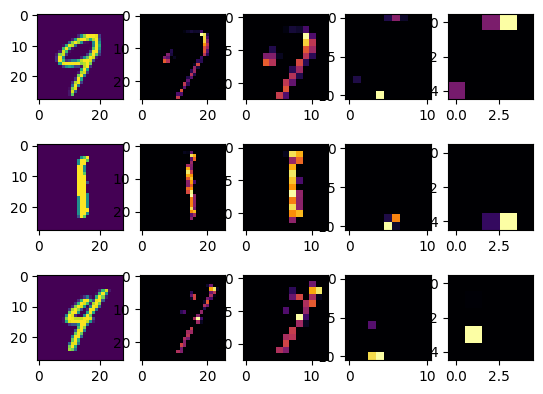

In [10]:
# Let's visualize the convolutions and pooling
import random

total_images = 3

f, axarr = plt.subplots(total_images,5)

images = [random.randint(0,9999) for _ in range(total_images)]

CONVOLUTION_NUMBER = 0
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)


for i in range(total_images):
    axarr[i,0].imshow(test_images[images[i]])

for x in range(1,5):
    for i in range(total_images):
        f = activation_model.predict(test_images[images[i]].reshape(1, 28, 28, 1))[x-1]
        axarr[i,x].imshow(f[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')

In [11]:
# All good time to save
tflite_model =  tf.lite.TFLiteConverter.from_keras_model(model).convert()
with open('models/model.tflite', 'wb') as model_lite:
  model_lite.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmptygfhcd2/assets


INFO:tensorflow:Assets written to: /tmp/tmptygfhcd2/assets
2023-04-23 19:56:28.656747: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2023-04-23 19:56:28.656821: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2023-04-23 19:56:28.657922: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmptygfhcd2
2023-04-23 19:56:28.663416: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2023-04-23 19:56:28.663476: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /tmp/tmptygfhcd2
2023-04-23 19:56:28.677837: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:353] MLIR V1 optimization pass is not enabled
2023-04-23 19:56:28.682380: I tensorflow/cc/saved_model/loader.cc:231] Restoring SavedModel bundle.
2023-04-23 19:56:28.862637: I tensorflow/cc/saved_model/loader.cc:215] Running initializatio